In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 🔍 1. Carga de los datos y descripción general

Empezamos cargando el dataset y sacando ideas generales del dataset:
- Número de registros
- Tipos de variables
- Valores nulos
- Estadísticas básica
- Correlaciones entre variables

In [3]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [35]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sin trastorno de sueño
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sin trastorno de sueño
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sin trastorno de sueño
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [47]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df = df.fillna("Sin trastorno de sueño")
#Relleno los nulos con el string "None", ya que solo hay nulos en sleep disorder y representan que no tienen
#ningún trastorno del sueño, asi que me interesa mostrar eso tambien

df = df.replace("Normal Weight", "Normal")
#En la columna BMI category(categoría de peso) hay un tipo que es “Normal”, pero hay algunas celdas aparecen
# con el string “Normal Weight”, y como no quiero que me los separe en 2 grupos distintos he renombrado todos
# los normal weight a normal para quedarme solo con los 3 grupos que debería: Normal, Overweight y Obese
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sin trastorno de sueño
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sin trastorno de sueño
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sin trastorno de sueño
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


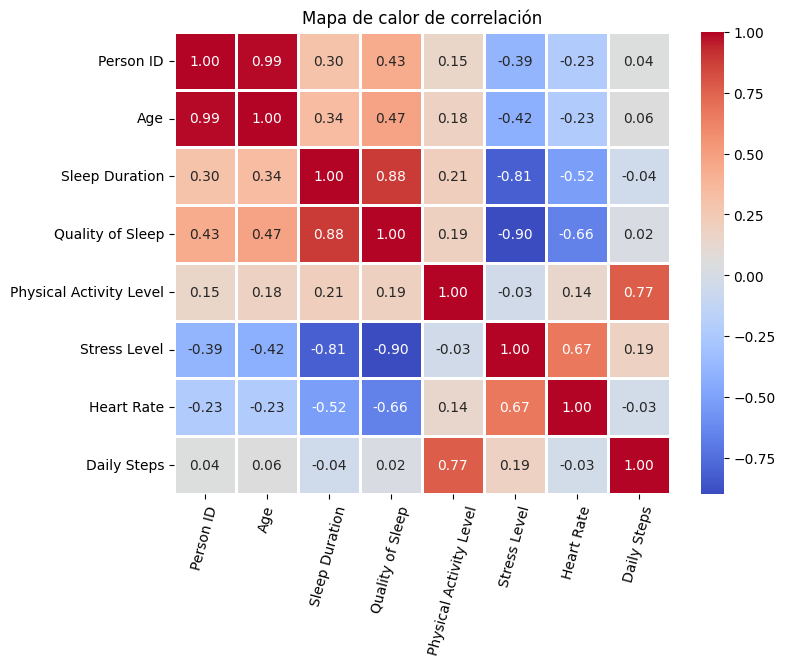

In [8]:
#Correlacion entre variables numericas

df_num = df.select_dtypes(include=['float64', 'int64'])

corr = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.9)
plt.title("Mapa de calor de correlación")
plt.xticks(rotation=75)
plt.show()

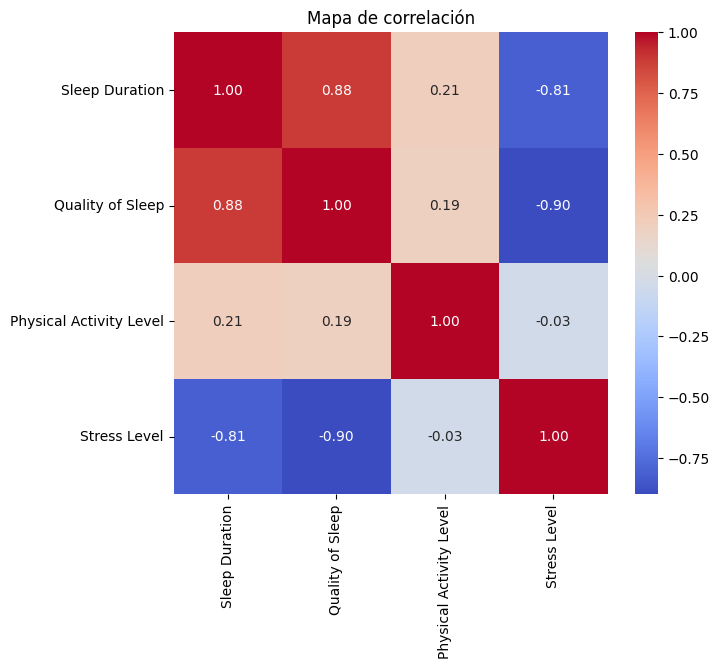

In [9]:
corr = df[["Sleep Duration", "Quality of Sleep", 
           "Physical Activity Level", "Stress Level"]].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación")
plt.show()


 Se observa que el estrés está muy relacionado con peor calidad de sueño (gran correlación negativa).
  Priorizar reducir estrés sería lo lógico para mejorar la calidad del sueño.

 La actividad física (Physical Activity Level) parece ayudar, aunque el efecto es moderado. Sin embargo,
  Daily Steps no muestra correlacion, osea que el tipo de ejercicio (intensidad y tiempo) podria ser mas
  relevante que el conteo diario de pasos(segun estos datos).

## 📊 2. Análisis Univariante

Analizamos cada variable de forma independiente para comprender su distribución.  
Nos centramos en:

- Duración del sueño
- Calidad del sueño
- Actividad física
- Nivel de estrés
- Categorías de salud (IMC)
- Trastornos del sueño

Esto nos ayuda a conocer el comportamiento individual de cada variable.

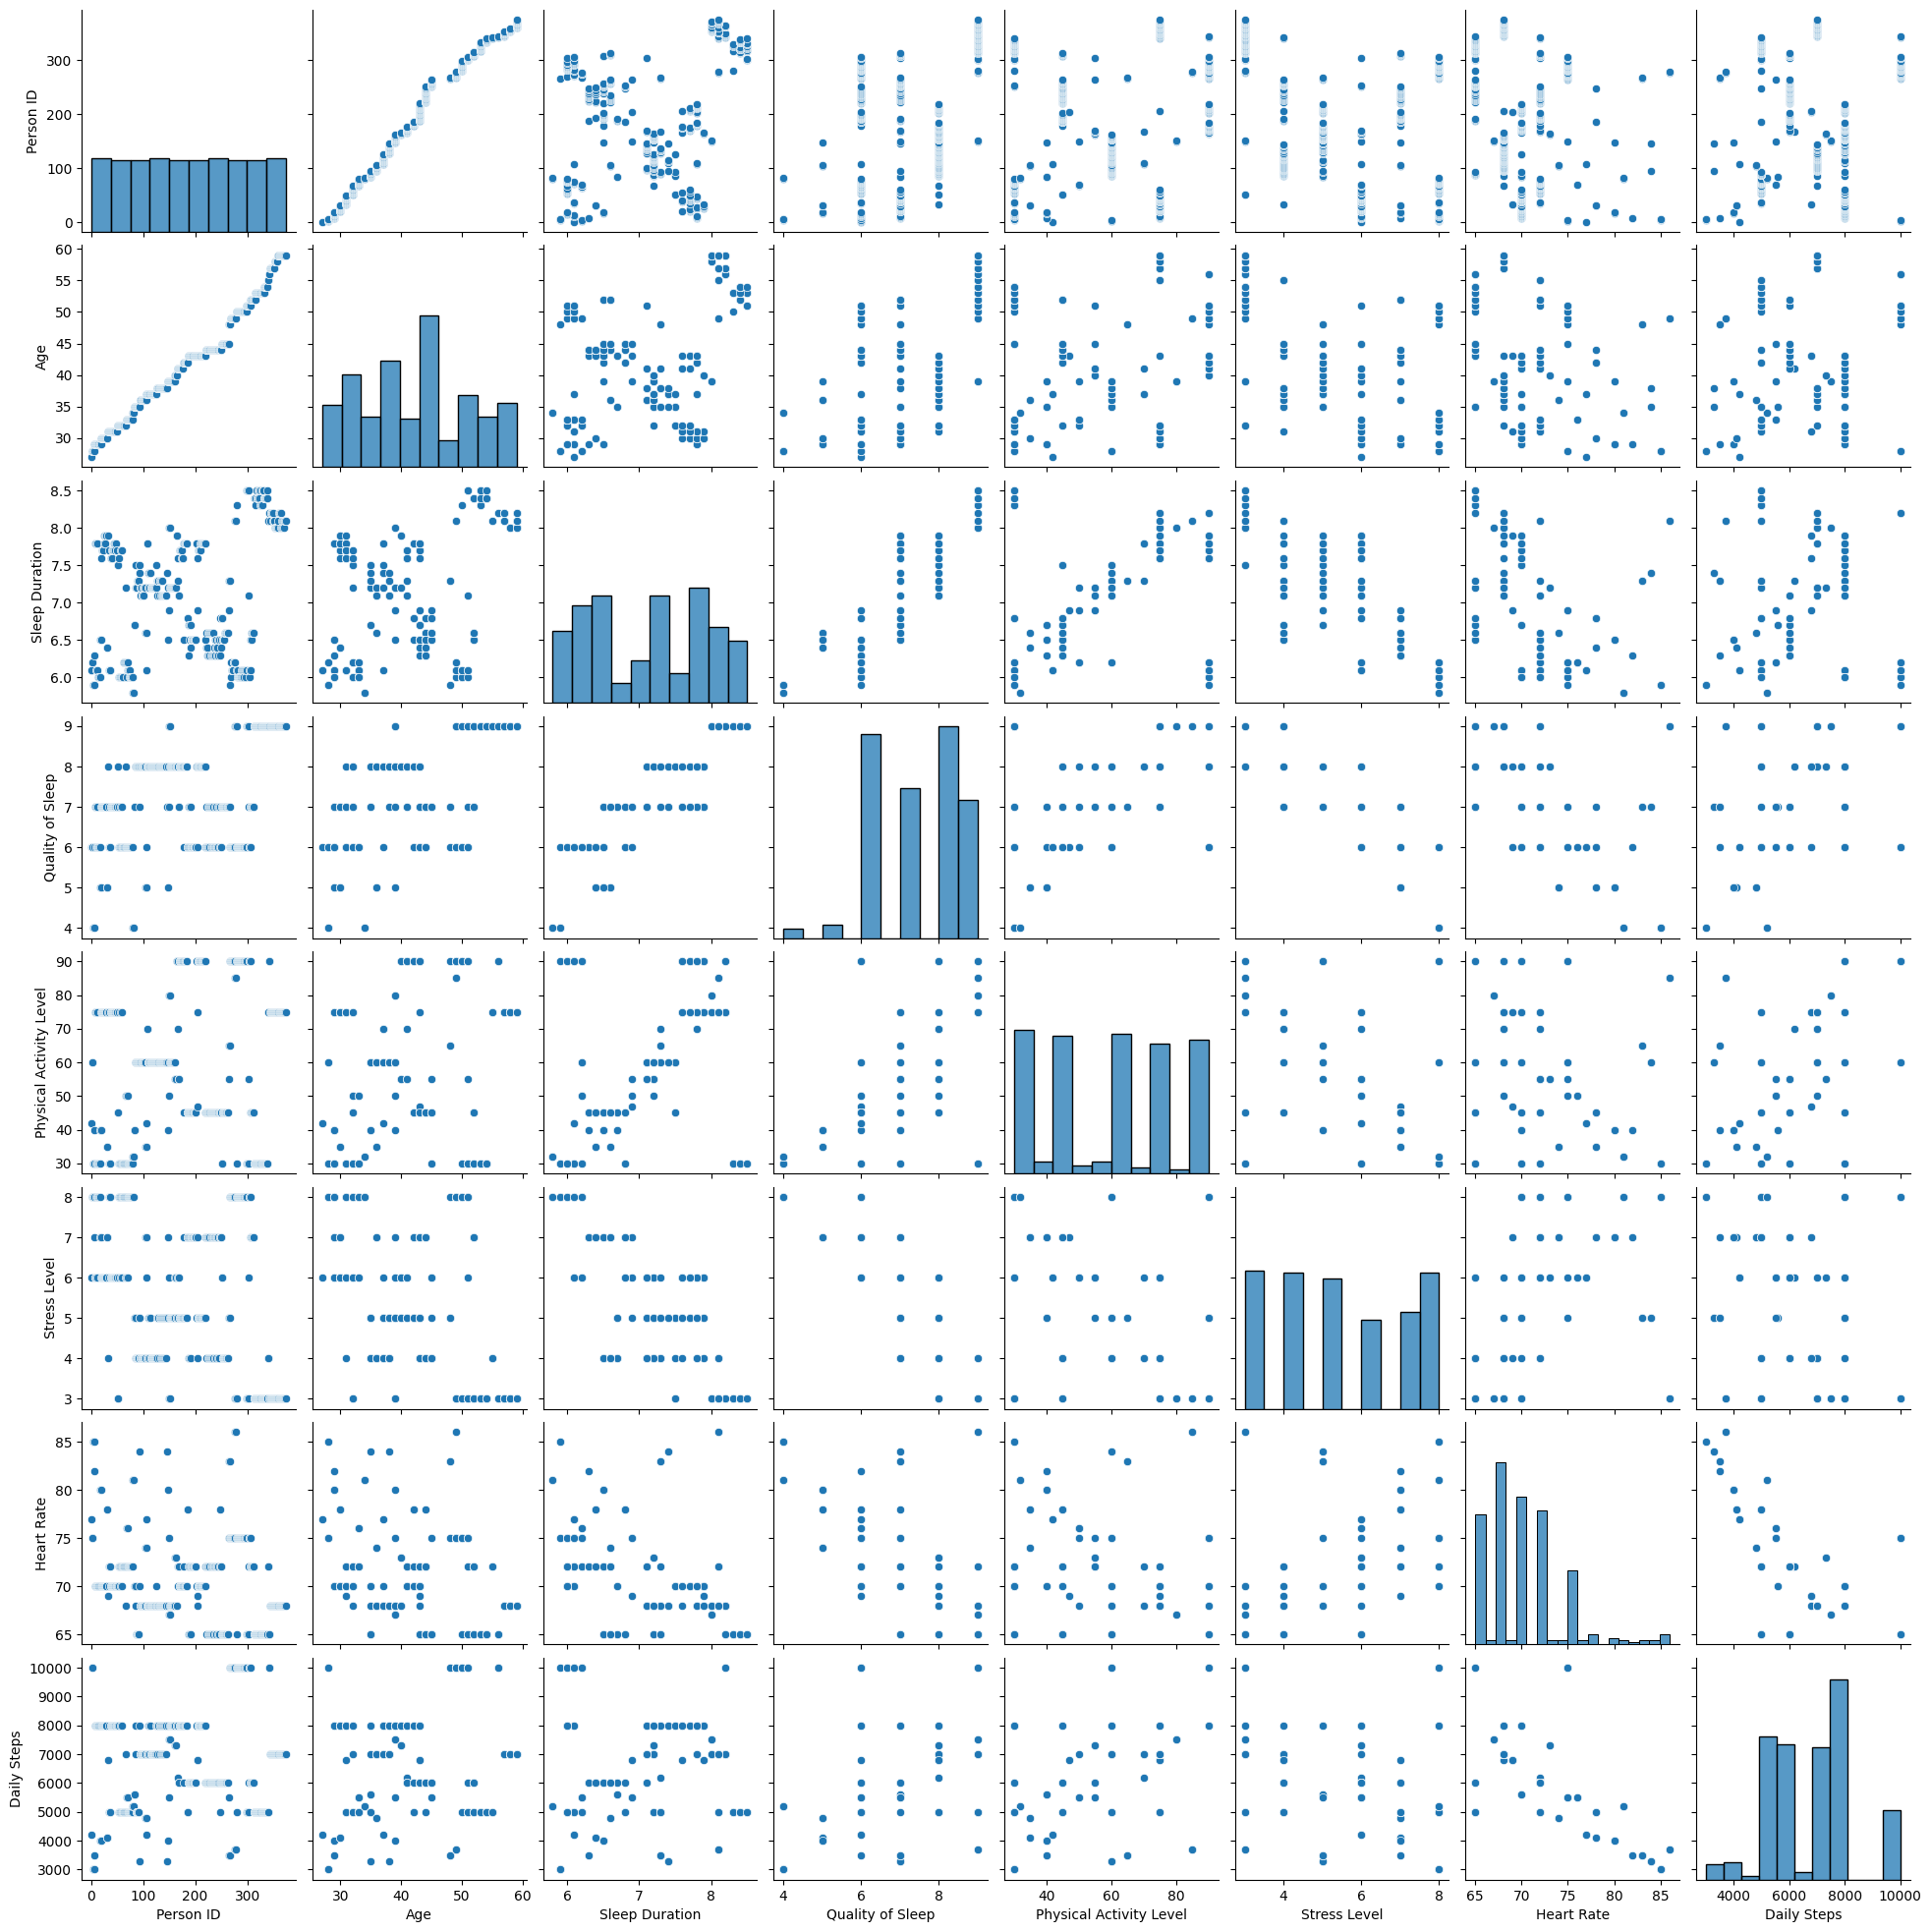

In [10]:
sns.pairplot(df);

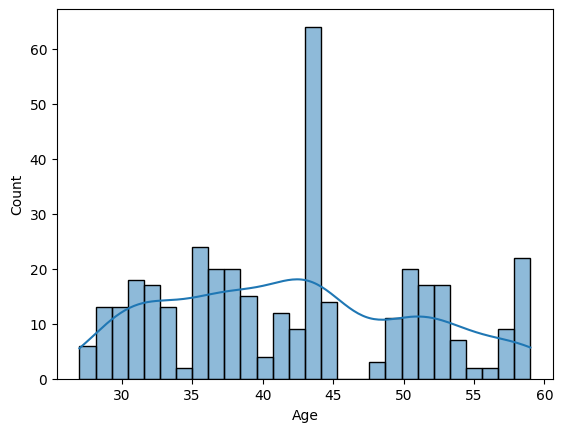

In [11]:
sns.histplot(df['Age'], bins=28, kde=True);

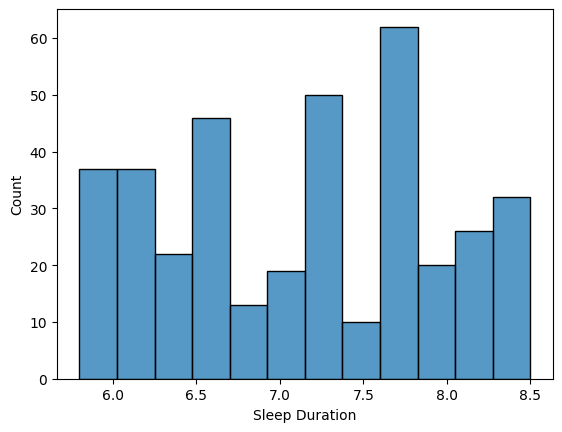

In [51]:
sns.histplot(df['Sleep Duration'], bins=12);

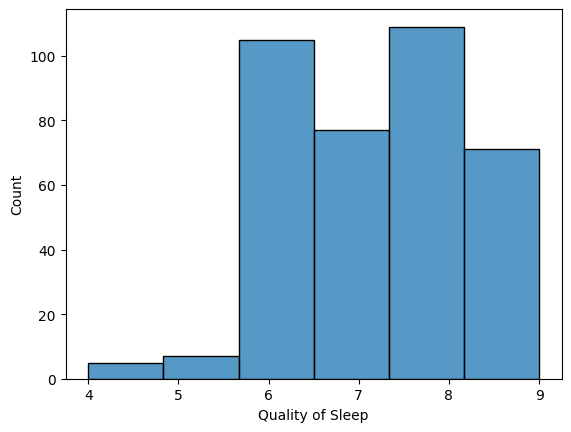

In [34]:
sns.histplot(df['Quality of Sleep'], bins=6);

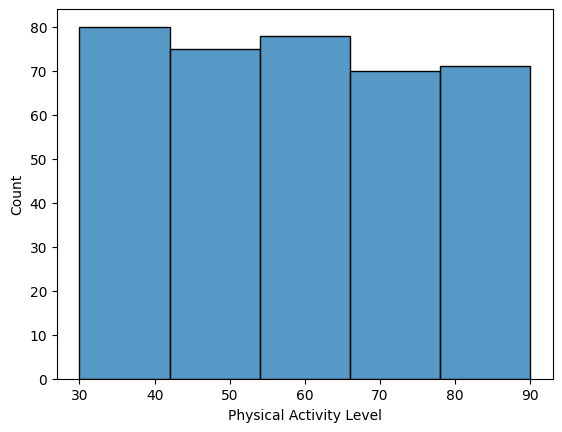

In [54]:
sns.histplot(df['Physical Activity Level'], bins=5);

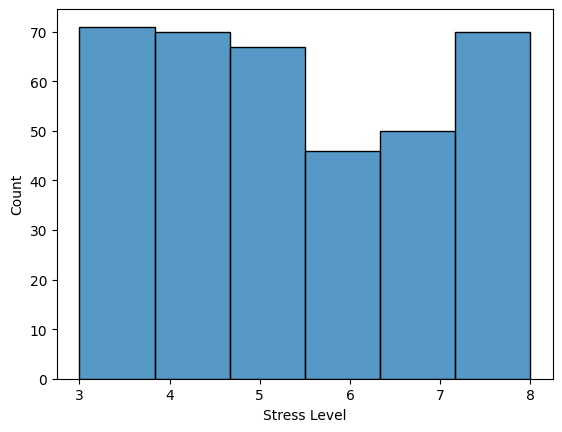

In [46]:
sns.histplot(df['Stress Level'], bins=6);

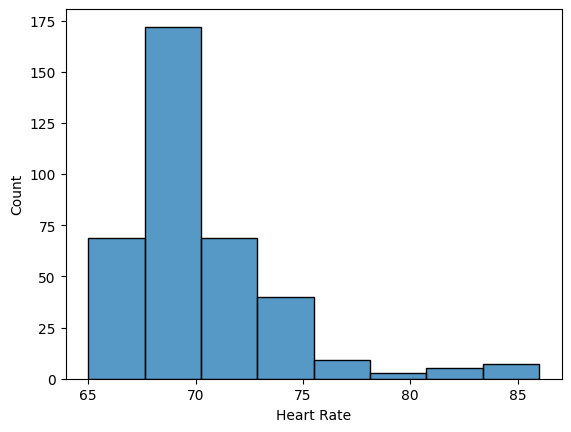

In [38]:
sns.histplot(df['Heart Rate'], bins=8);

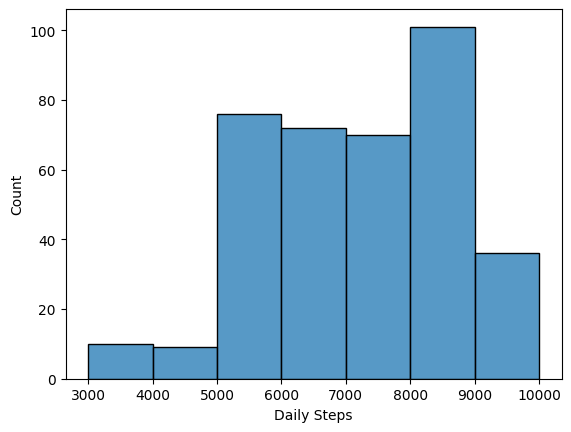

In [56]:
sns.histplot(df['Daily Steps'], bins=7);

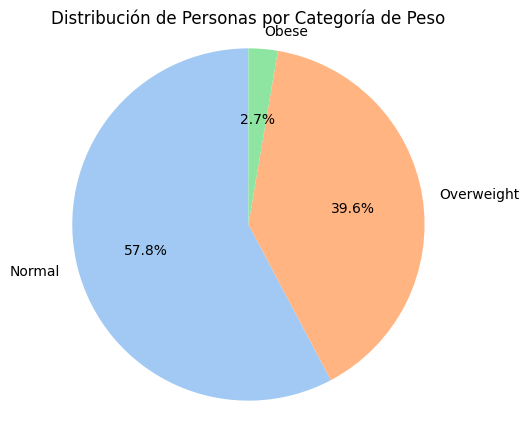

In [65]:
bmi_counts = df["BMI Category"].value_counts()

plt.figure(figsize=(5,5))

plt.pie(
    bmi_counts,
    labels=bmi_counts.index,
    autopct='%1.1f%%', 
    startangle=90,
    colors=sns.color_palette("pastel")
)

plt.title("Distribución de Personas por Categoría de Peso")
plt.axis('equal')  # Mantiene el pie chart circular
plt.show()

## 🔗 3. Análisis Bivariante

En esta sección estudiamos relaciones entre variables clave:
- Actividad física vs calidad del sueño
- Estrés vs duración del sueño
- IMC vs trastorno del sueño
- Ocupación vs calidad del sueño

Así identificamos patrones entre estilo de vida y descanso.


Voy a empezar estudiando la relacion de la calidad y duración del sueño con el estres

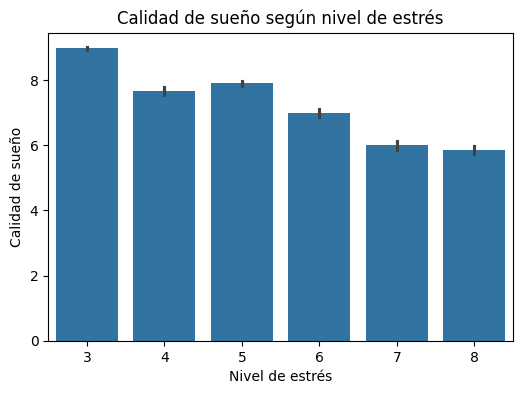

In [60]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Stress Level", y="Quality of Sleep", estimator="mean")
plt.title("Calidad de sueño según nivel de estrés")
plt.xlabel("Nivel de estrés")
plt.ylabel("Calidad de sueño")
plt.show()

In [21]:
#En este que compara calidad de sueño con estres se ve hasta mas clara la tendencia, coincidiendo
# que las personas con mejor calidad de sueño son las de menor nivel de estres y viceversa

Ahora veremos la relacion entre actividad fisica y calidad de sueño

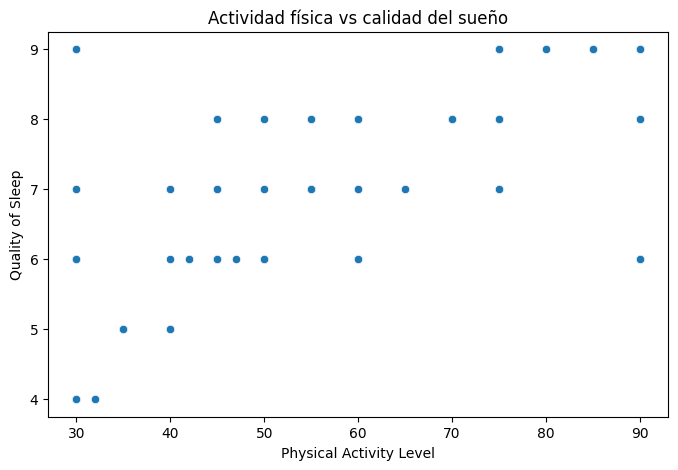

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Physical Activity Level", y="Quality of Sleep")
plt.title("Actividad física vs calidad del sueño")
plt.show()

Y termino mostrando la distribucion de calidad de sueño por ocupacion

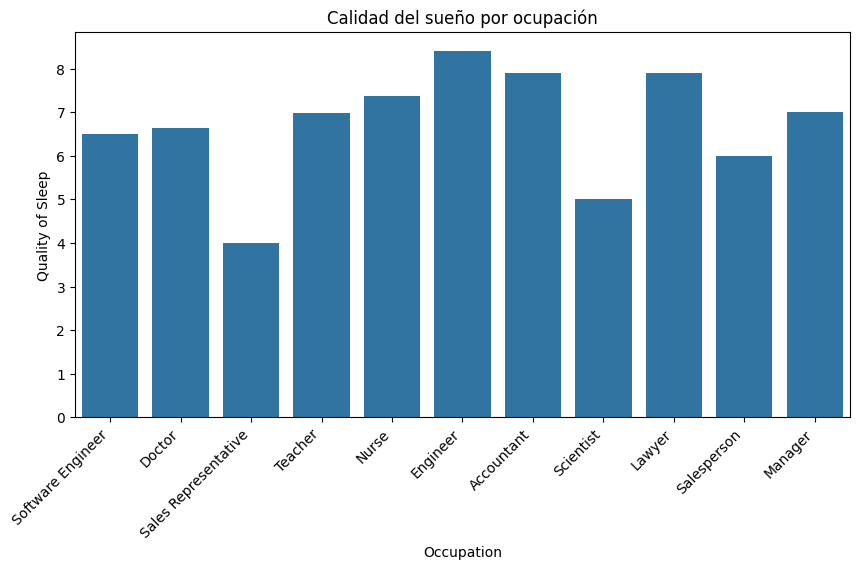

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Occupation", y="Quality of Sleep", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title("Calidad del sueño por ocupación")
plt.show()

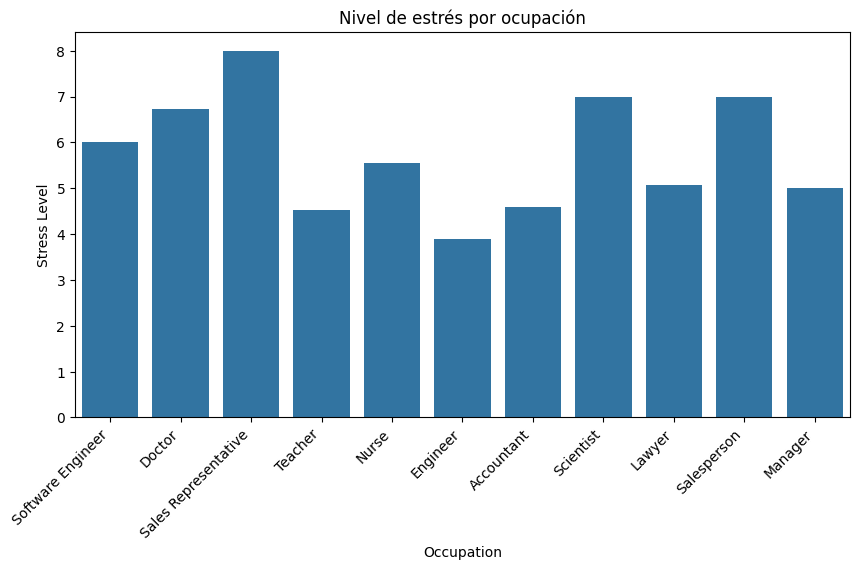

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Occupation", y="Stress Level", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title("Nivel de estrés por ocupación")
plt.show()

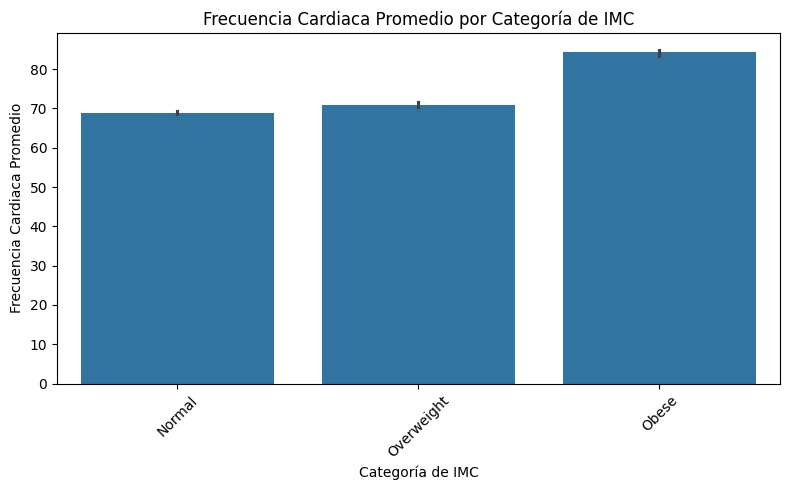

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir el orden deseado
order = ["Normal", "Overweight", "Obese"]

plt.figure(figsize=(8,5))

sns.barplot(
    data=df,
    x="BMI Category",
    y="Heart Rate",
    order=order,
    estimator="mean"
)

plt.xlabel("Categoría de IMC")
plt.ylabel("Frecuencia Cardiaca Promedio")
plt.title("Frecuencia Cardiaca Promedio por Categoría de IMC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 😴 4. Trastornos del sueño

Exploramos la distribución de:
- Ningún trastorno
- Insomnio
- Apnea del sueño

También analizamos cómo se relacionan con:
- Duración del sueño
- IMC
- Estrés

Esto permite detectar factores de riesgo asociados.


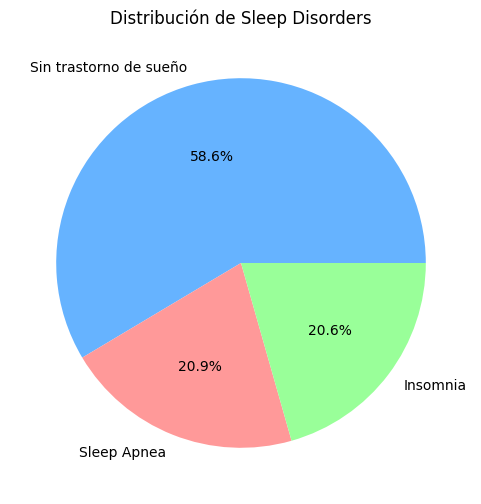

In [24]:
sleep_counts = df['Sleep Disorder'].value_counts()

# Graficar tarta
plt.figure(figsize=(6,6))
plt.pie(
    sleep_counts,
    labels=sleep_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999','#99ff99']  
)
plt.title("Distribución de Sleep Disorders")
plt.show()

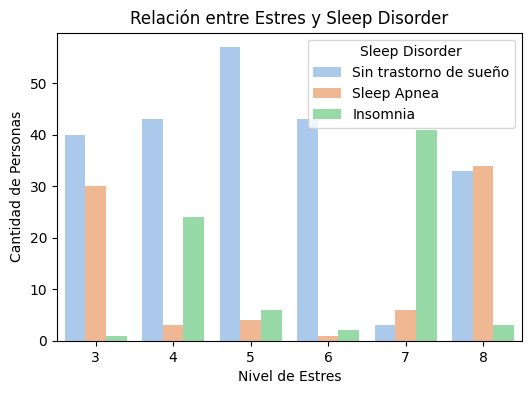

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stress Level', hue='Sleep Disorder', data=df, palette='pastel')
plt.title("Relación entre Estres y Sleep Disorder")
plt.xlabel("Nivel de Estres")
plt.ylabel("Cantidad de Personas")
plt.show()

In [26]:
# Se observa que el insomnio si aparece mas en personas con un nivel alto de estres, 
# pero con la apnea de sueño no esta tan claro asi que voy a observar tambien su relación
#con el nivel de actividad fisico y la categoria de peso

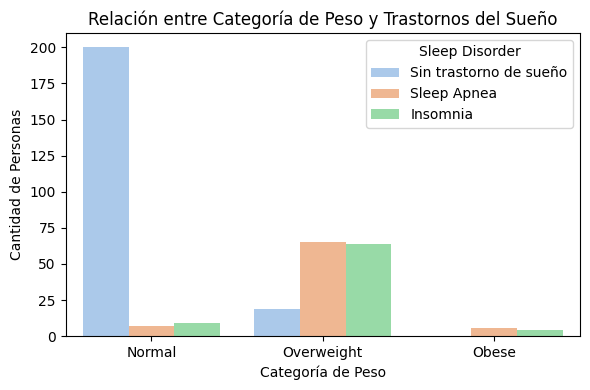

In [63]:
plt.figure(figsize=(6,4))

order_bmi = ["Normal", "Overweight", "Obese"]

sns.countplot(
    data=df,
    x='BMI Category',
    hue='Sleep Disorder',
    order=order_bmi,
    palette='pastel'
)
plt.title("Relación entre Categoría de Peso y Trastornos del Sueño")
plt.xlabel("Categoría de Peso")
plt.ylabel("Cantidad de Personas")
plt.tight_layout()
plt.show()


In [28]:
#Aqui ya si observo mucha mas relación, ya que se puede observar que casi todas las personas 
# que presentan trastorno de sueño son personas con sobrepeso. Sobre todo concluimos que la apnea 
#de sueño va muy ligada al nivel de peso, ya que a diferencia del insomnio, esta no tenia ninguna 
#relacion con el nivel estres

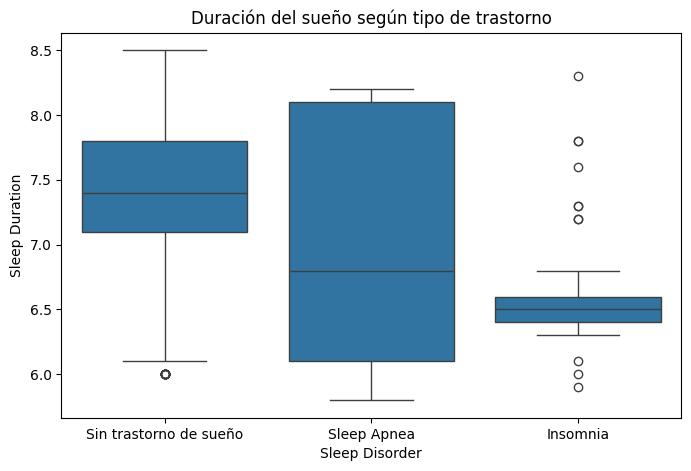

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Sleep Disorder", y="Sleep Duration")
plt.title("Duración del sueño según tipo de trastorno")
plt.show()

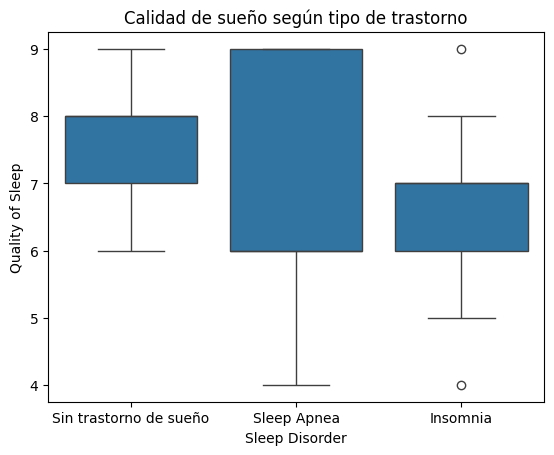

In [30]:
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df)
plt.title("Calidad de sueño según tipo de trastorno")
plt.show()

# 🧠 5. Conclusiones del análisis

- Las personas duermen en promedio menos de lo recomendado (6.2 h).
- Los niveles altos de estrés están asociados con peor calidad del sueño.
- La actividad física se relaciona con mejor descanso, aunque parece no ser tan relevante como mantener un  nivel bajo de estres.
- El estres tambien esta vinculado a muchos casos de insomnio.
- El IMC elevado está vinculado a mayor apnea del sueño.
- La calidad del sueño contiene valores subjetivos, por lo que algunas inconsistencias son esperables.

En conjunto, estos resultados indican que un estilo de vida saludable favorece un sueño de mejor calidad, y los factores que mas pueden perjudicar nuestra calidad de sueño son el estres elevado y el sobrepeso
